In [1]:
import pandas as pd
import numpy as np
import glob
import dropbox as db
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from soccer_pitch import full_pitch, half_pitch

In [ ]:
def box_map():
    # Create figure
    fig=plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(1,1,1)

    # Set color Scheme
    line_color = '#FAFAFA'
    fig.set_facecolor("#66BB6A")

    # Pitch Outline & Centre Line
    #plt.plot([0,0],[0,40], color="black")
    #plt.plot([0,80],[40,40], color="black")
    #plt.plot([-25,25],[25,25], color='white')
    plt.plot([-25,25],[0,0], color=line_color)

    # Penalty Area
    plt.plot([-22,22],[18,18], color=line_color)
    plt.plot([-22,-22],[0,18], color=line_color)
    plt.plot([22,22],[0,18], color=line_color)

    # 6-yard Box
    plt.plot([-10,10],[6,6], color=line_color)
    plt.plot([-10,-10],[0,6], color=line_color)
    plt.plot([10,10],[0,6], color=line_color)

    # Goal
    plt.plot([-4,4],[-2,-2], color=line_color)
    plt.plot([-4,-4],[0,-2], color=line_color)
    plt.plot([4,4],[0,-2], color=line_color)

    # Penalty Spot
    PenSpot = plt.Circle((0,12),0.5,color=line_color)
    ax.add_patch(PenSpot)

    # Penalty Arc
    penalty_arc = Arc((0,8.3),height=30,width=30,angle=90,theta1=310,theta2=50,color=line_color)
    ax.add_patch(penalty_arc)

    #Tidy Axes
    plt.axis('off')

In [ ]:
def full_pitch(background, line, provider):
     # Create figure
    fig=plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(1,1,1)

     # Set color Scheme
    line_color = line
    fig.set_facecolor(background)

    # Set dimensions Instat
    if provider == "Instat":
        length = 105
        width = 68
        pen_area_x = 16.5
        pen_area_y = 13.85
        pen_area_y2 = 54.15
        six_yard_x = 5.5
        six_yard_y = 24.85
        six_yard_y2 = 43.15
        penalty_spot = [11,34]
    else:
        length = 120
        width = 80
        pen_area_x = 18
        pen_area_y = 18
        pen_area_y2 = 62
        six_yard_x = 6
        six_yard_y = 30
        six_yard_y2 = 50
        penalty_spot = [12,40]


    # Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=line_color)
    plt.plot([0,length],[width,width], color=line_color)
    plt.plot([length,length],[width,0], color=line_color)
    plt.plot([length,0],[0,0], color=line_color)
    plt.plot([length / 2, length / 2], [0, width], color=line_color)

    # Left Penalty Area
    plt.plot([0,pen_area_x], [pen_area_y, pen_area_y], color=line_color)
    plt.plot([0,pen_area_x], [pen_area_y2,pen_area_y2], color=line_color)
    plt.plot([pen_area_x,pen_area_x], [pen_area_y,pen_area_y2], color=line_color)

    # Left 6-yard Box
    plt.plot([0,six_yard_x], [six_yard_y, six_yard_y], color=line_color)
    plt.plot([0,six_yard_x], [six_yard_y2,six_yard_y2], color=line_color)
    plt.plot([six_yard_x,six_yard_x], [six_yard_y,six_yard_y2], color=line_color)

    # Left Penalty Spot
    PenSpot = plt.Circle(penalty_spot,0.5, color=line_color)
    ax.add_patch(PenSpot)

    # Left Penalty Arc
    penalty_arc = Arc(penalty_spot,height=18.3,width=18.3,angle=360,theta1=307,theta2=53, color=line_color)
    ax.add_patch(penalty_arc)

     # Right Penalty Area
    plt.plot([length,length - pen_area_x], [width - pen_area_y, width - pen_area_y], color=line_color)
    plt.plot([length, length - pen_area_x], [width - pen_area_y2, width - pen_area_y2], color=line_color)
    plt.plot([length - pen_area_x, length - pen_area_x], [width - pen_area_y, width - pen_area_y2], color=line_color)

    # Right 6-yard Box
    plt.plot([length, length - six_yard_x], [width - six_yard_y, width - six_yard_y], color=line_color)
    plt.plot([length, length - six_yard_x], [width - six_yard_y2, width - six_yard_y2], color=line_color)
    plt.plot([length - six_yard_x, length - six_yard_x], [width - six_yard_y, width - six_yard_y2], color=line_color)

    # Right Penalty Spot
    PenSpot = plt.Circle((length-penalty_spot[0], penalty_spot[1]),0.5, color=line_color)
    ax.add_patch(PenSpot)

    # Right Penalty Arc
    penalty_arc = Arc((length-penalty_spot[0], penalty_spot[1]),height=18.3,width=18.3,angle=180,theta1=307,theta2=53, color=line_color)
    ax.add_patch(penalty_arc)

    #Prepare Circles
    centreCircle = plt.Circle((length/2, width/2),9.15,color=line_color, fill=False)
    centreSpot = plt.Circle((length/2, width/2),0.8,color=line_color)
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
 
    #Tidy Axes
    plt.axis('off')

# Statsbomb Data

Todo: 
* Join related Events from goalkeeper actions with the respective action of the dataset. i.e. add the shot event to the goalkeeper event goal/save ...

In [ ]:
filelocation = '/Users/matthiashugli/Dropbox/bucket/statsbomb-data/*.json'

df = pd.DataFrame()
for filename in glob.glob(filelocation):
    file = pd.read_json(filename)
    file.insert(1, 'filename', filename)
    df = df.append(file)

In [ ]:
df['event_name'] = [v['name'] for k, v in df['type'].items()]
df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
statsbomb_gk = df[df['event_name'] == 'Goal Keeper']
statsbomb_gk = statsbomb_gk[['id', 'timestamp', 'related_events','player','location', 'goalkeeper', 'event_name', 'event_detail']]
statsbomb_gk['type'] = [v['type']['name'] for k, v in statsbomb_gk['goalkeeper'].items()]
statsbomb_gk = statsbomb_gk[statsbomb_gk['type'] != 'Shot Faced'].reset_index()
goalkeeper_exp = pd.json_normalize(statsbomb_gk['goalkeeper'])
goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
statsbomb_gk = statsbomb_gk.merge(goalkeeper_exp, left_index=True, right_index=True)
statsbomb_gk['related_events'] = [i[0] for i in statsbomb_gk['related_events']]
statsbomb_gk = statsbomb_gk.merge(df, left_on='related_events', right_on='id')
statsbomb_gk['type_y'] = [v['name'] for k, v in statsbomb_gk['type_y'].items()]
#statsbomb_gk.drop(columns=['index_x', 'goalkeeper_x', 'index_y', 'type.id', 'outcome.id', 'technique.id', 'position.id', 'body_part.id', 'type.name'], inplace=True)

In [ ]:
shots = statsbomb_gk[['type_x', 'type_y', 'goalkeeper_x', 'shot', 'location_x', 'location_y', 'minute', 'player_x']]
shots = shots[shots['type_y'] == 'Shot']
shots['x_goalkeeper'] = [i[0] for i in shots['location_x']]
shots['y_goalkeeper'] = [i[1] for i in shots['location_x']]
shots['x_location'] = [i[0] for i in shots['location_y']]
shots['y_location'] = [i[1] for i in shots['location_y']]
#goalkeeper_exp = pd.json_normalize(shots['goalkeeper_x'])
#goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
#shots = shots.merge(goalkeeper_exp, left_index=True, right_index=True)
#shot_exp = pd.json_normalize(shots['shot'])
#shot_exp = shot_exp[shot_exp['outcome.name'].notna()].reset_index()
#shots = shots.merge(shot_exp, left_index=True, right_index=True)
#shots = shots[shots['open_goal'].isna()].reset_index()
shots['xG'] = [v['statsbomb_xg'] for k, v in shots['shot'].items()]
shots['goalkeeper'] = [v['name'] for k, v in shots['player_x'].items()]

shots = shots[['minute', 'goalkeeper', 'type_x', 'xG', 'x_goalkeeper', 'y_goalkeeper', 'x_location', 'y_location']]
shots['x_gk'] = shots['y_goalkeeper'] - 40
shots['y_gk'] = shots['x_goalkeeper']
shots['x_shot'] = 80 - shots['y_location'] -40
shots['y_shot'] = 120 - shots['x_location']
shots = shots.reset_index()
shots = shots[['minute','goalkeeper', 'type_x', 'xG', 'x_gk', 'y_gk', 'x_shot', 'y_shot']]

# Math Calculations
shots['shot_distance'] = np.sqrt( np.square(shots['x_shot']) + np.square(shots['y_shot']))
shots['gk_distance'] = np.sqrt(np.square(shots['x_shot'] - shots['x_gk']) + np.square(shots['y_shot'] - shots['y_gk']))
shots['shot_location'] = shots['x_shot'].apply(lambda x: 'frontal' if x < 4 and x > -4 else 'angle')

In [ ]:
goals = shots[shots['type_x'] == 'Goal Conceded']
saves = shots[shots['type_x'] == 'Shot Saved']
short_dist = shots[shots['shot_distance'].between(9, 18)]

In [ ]:
#shots.head()
len(shots)

In [ ]:
box_map()
for i in range(len(shots)):
    if shots['type_x'][i] == 'Shot Saved':
        hue_color = 'grey'
    else:
        hue_color = 'red'

    if shots['goalkeeper'][i] == 'Marc-André ter Stegen':
        gk_color = 'blue'
    else:
        gk_color = 'purple'
    
    plt.plot([int(shots['x_shot'][i]), int(shots['x_gk'][i])], [int(shots['y_shot'][i]), int(shots['y_gk'][i])], color=hue_color)

    plt.plot(int(shots['x_gk'][i]), int(shots['y_gk'][i]), 'o', color=gk_color)

In [ ]:
sns.histplot(data=saves, x='shot_distance')
plt.show()

sns.histplot(data=saves, x='gk_distance')
plt.show()

In [ ]:
sns.histplot(data=goals, x='shot_distance')
plt.show()

sns.histplot(data=goals, x='gk_distance')
plt.show()

In [ ]:
sns.scatterplot(data=short_dist, x='shot_distance', y='gk_distance', hue='shot_location')
plt.show()

# Instat Data

In [ ]:
# Field dimension on Instat 105 x 68 y
url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=36&start_ms=0&match_id=1969128&lang_id=1&lang=&format=json'


df = pd.DataFrame()
file = pd.read_json(url)
df = df.append(file['data']['row'])

match_url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=35&tournament_id=78&season_id=28&date_start=&date_end=&lang_id=1&lang=&format=json'

match_df = pd.DataFrame()
file = pd.read_json(match_url)
match_df = match_df.append(file['data']['row'])

In [ ]:
match_df[['id', 'match_date', 'team1_name', 'team2_name']]

In [ ]:
#df['action_name'].drop_duplicates().tail(50)
df[(df['action_name'].str.contains('Chance')) | (df['action_name'] == 'Assist')].drop_duplicates().iloc[:,0:20]

In [ ]:
df[df['action_name'] == 'Goal'].iloc[:,0:15].reset_index()
#sample = df[df['id'] == '20471'][['action_name', 'player_name', 'opponent_name', 'pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y', 'gate_x', 'gate_y']]

In [ ]:
df['second'] = df['second'].astype(float)
df[df['second'].between(1875, 1890)].iloc[:, 0:20]

In [ ]:
df[(df['position_name'] == 'Goalkeeper') & (df['action_name'] == 'Supersaves')].iloc[:,0:20].reset_index()
#df[df['action_name'] == 'Ball receiving'].iloc[:,0:15]
#df[df['position_name'] == 'Goalkeeper']['action_name'].drop_duplicates()

In [ ]:
df[df['position_name'] == 'Goalkeeper']
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
gk_set = df[['player_name', 'action_name', 'pos_x', 'pos_y', 'zone_name', 'attack_type_name', 'gate_x', 'gate_y', 'shot_type']]

In [ ]:
gk_set[gk_set['player_name'] == 'Mory Diaw'].groupby('action_name').count()

In [ ]:
gk_set[gk_set['action_name'] == 'Supersaves']

In [ ]:
sample

In [ ]:
# 68 / 80 = 0.85
# 105 / 120 = 0.875
34 / 0.85

sample = sample[['pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y', 'gate_x', 'gate_y']].astype(float)
sample['x_shot'] = (80 - sample['pos_y'] / 0.85 - 40) * -1
sample['y_shot'] = 120 - sample['pos_x'] / 0.875
sample['final_x'] = 80 - sample['pos_dest_y'] / 0.85 -40
sample['final_y'] = 120 - sample['pos_dest_x'] / 0.875

In [ ]:
box_map()
sns.scatterplot(data=sample, x='final_x', y='final_y')


# Instat XML

In [ ]:
# Field dimension on Instat 105 x 68 y
url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=36&start_ms=0&match_id=1969128&lang_id=1&lang=&format=json'


df = pd.DataFrame()
file = pd.read_json(url)
df = df.append(file['data']['row'])

match_url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=35&tournament_id=78&season_id=28&date_start=&date_end=&lang_id=1&lang=&format=json'

match_df = pd.DataFrame()
file = pd.read_json(match_url)
match_df = match_df.append(file['data']['row'])

In [208]:
import xmltodict
import json
import xml.etree.ElementTree as etree

# Field dimension on Instat 105 x 68 y
source_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220220-76331-1ahfybv.xml'
large_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220119-89784-gbgtk8.xml'
filtered_export = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220224-15161-1pjrfk1.xml'
servette = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/20-02-2022--Switzerland--Credit-Suisse-Super-LeagueServette-1-1-Luzern20220225-78204-1s38f86.xml'
#filtered_export = '/Users/matthiashugli/Dropbox/bucket/sample-data/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220217-48763-1if7ja.xml'

filelocation = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/*.xml'

all_events = []
for filename in glob.glob(filelocation):
    prstree = etree.parse(filename)
    root = prstree.getroot()

    event_items = []
    event_subitems = []
    header = ['start', 'end', 'player', 'x_pos', 'y_pos', 'team', 'action', 'half']

    for r in root.iter('ALL_INSTANCES'):
        for inst in r.iter('instance'):
        
            start = inst.find('start').text
            end = inst.find('end').text
            player = inst.find('code').text

            if inst.find('pos_x') != None:
                x_pos = inst.find('pos_x').text
                y_pos = inst.find('pos_y').text
            
            event_items = [start, end, player, x_pos, y_pos]
            
            for label in inst.iter('label'):
                labels = label.find('text').text
                event_items.append(labels)

            all_events.append(event_items)

df = pd.DataFrame(all_events, columns=header)

In [209]:
data_types_dict = {'start': float, 'end': float, 'x_pos': float, 'y_pos': float}
df = df.astype(data_types_dict)

In [210]:
#df[df['action'].isin(['Shot into the bar/post', 'Own goal'])]
df[615:635]
#df[df['start'] == 2940.65]

,start,end,player,x_pos,y_pos,team,action,half
615,2928.15,2948.15,34. Birama Ndoye,37.0,60.9,Sion,Passes accurate,2nd half
616,2932.82,2952.82,32. Loris Benito Souto,36.5,67.0,Sion,Passes accurate,2nd half
617,2934.71,2954.71,9. Dejan Sorgic,79.7,14.3,Luzern,Picking-ups,2nd half
618,2934.71,2954.71,9. Dejan Sorgic,79.7,14.3,Luzern,Passes accurate,2nd half
619,2936.10,2956.10,10. Samuele Campo,73.4,16.8,Luzern,Passes accurate,2nd half
620,2940.65,2960.65,39. Nathanael Saintini,6.8,23.9,Sion,Interceptions,2nd half
621,2940.65,2960.65,19. Filip Ugrinic,96.9,46.6,Luzern,Shots,2nd half
622,2967.50,2987.50,19. Filip Ugrinic,105.0,68.0,Luzern,Passes (inaccurate),2nd half
623,2969.12,2989.12,34. Birama Ndoye,6.4,33.8,Sion,Interceptions,2nd half
624,2973.07,2993.07,2. Mohamed Drager,68.1,35.1,Luzern,Picking-ups,2nd half


In [211]:
# Action variables
shot_outcome_actions = ['Wide shot', 'Shot on target', 'Shot into the bar/post', 'Goals']
goal_situations = ['Assists', 'Goals', 'Free-kick attacks', 'penalty attack']
gk_actions = ['Wide shot (Goalkeepers)', 'Shot on target (saved)', 'Goals conceded']

In [212]:
shots = df[df['action'] == 'Shots'].reset_index()

action_before_shots = df.reset_index()
action_before_shots.rename(columns={'index': 'id'}, inplace=True)

for i in range(1, 5):
    action_before_shots['action-' + str(i)] = action_before_shots.id.shift(i)
    action_before_shots['action+' + str(i)] = action_before_shots.id.shift(-i)

melt_actions = pd.melt(action_before_shots, id_vars=action_before_shots.iloc[:,:8], value_vars=action_before_shots.iloc[:,9:])
melt_actions = melt_actions[melt_actions['action'] == 'Shots']
melt_actions.dropna(subset=['value'], inplace=True)
melt_actions.merge(action_before_shots, left_on='value', right_on='id')
melt_actions['value'] = melt_actions['value'].astype('int64')
merge_actions = melt_actions.merge(action_before_shots, left_on='value', right_on='id').reset_index()

merge_actions['time_diff'] = (merge_actions['start_y'] - merge_actions['start_x'])
merge_actions['field_progression'] = merge_actions['x_pos_x'] - merge_actions['x_pos_y']

last_action = merge_actions[(merge_actions['time_diff'] <= 0) & \
                         (~merge_actions['action_y'].isin(shot_outcome_actions)) & \
                         (merge_actions['team_x'] == merge_actions['team_y'])] \
        .sort_values(by=['id_x', 'time_diff']).drop_duplicates(subset=['id_x'], keep='last')

gk_action = merge_actions[merge_actions['action_y'].isin(['Wide shot (Goalkeepers)', 'Shot on target (saved)'])].sort_values(by=['id_x'])

shot_creation = shots.merge(last_action[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x')
shot_creation = shot_creation.merge(gk_action[['id_x', 'team_y', 'action_y', 'player_y']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'half', 'id_x_x', 'id_x_y']) \
    .rename(columns={'team': 'attacking_team', 'x_pos_y': 'x_pos_ass', 'y_pos_y': 'y_pos_ass', 'team_y': 'defending_team', 'player_y': 'goalkeeper', 'action_y_x': 'action', 'action_y_y': 'outcome_gk', 'action': 'outcome'})

In [213]:
goals = df[df['action'] == 'Goals'].reset_index()

action_before_goals = df.reset_index()
action_before_goals.rename(columns={'index': 'id'}, inplace=True)

for i in range(1, 5):
    action_before_goals['action-' + str(i)] = action_before_goals.id.shift(i)
    action_before_goals['action+' + str(i)] = action_before_goals.id.shift(-i)

melt_goals = pd.melt(action_before_goals, id_vars=action_before_goals.iloc[:,:8], value_vars=action_before_goals.iloc[:,9:])
melt_goals = melt_goals[melt_goals['action'] == 'Goals']
melt_goals.dropna(subset=['value'], inplace=True)
melt_goals.merge(action_before_goals, left_on='value', right_on='id')
melt_goals['value'] = melt_goals['value'].astype('int64')
merge_goals = melt_goals.merge(action_before_goals, left_on='value', right_on='id').reset_index()

merge_goals['time_diff'] = np.where(merge_goals['start_y'] - merge_goals['start_x'] > 0, \
                                    (merge_goals['start_y'] - merge_goals['start_x']) * -1, \
                                    merge_goals['start_y'] - merge_goals['start_x'])
merge_goals['field_progression'] = merge_goals['x_pos_x'] - merge_goals['x_pos_y']

last_action = merge_goals[(merge_goals['action_y'].isin(goal_situations)) & \
                         (merge_goals['team_x'] == merge_goals['team_y'])] \
        .sort_values(by=['id_x', 'time_diff'], ascending=True).drop_duplicates(subset=['id_x'], keep='last')

gk_action = merge_goals[merge_goals['action_y'] == 'Goals conceded'].sort_values(by=['id_x'])

goal_creation = goals.merge(last_action[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x')
goal_creation = goal_creation.merge(gk_action[['id_x', 'team_y', 'action_y', 'player_y']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'half', 'id_x_x', 'id_x_y']) \
    .rename(columns={'team': 'attacking_team', 'x_pos_y': 'x_pos_ass', 'y_pos_y': 'y_pos_ass', 'team_y': 'defending_team', 'player_y': 'goalkeeper', 'action_y_x': 'action', 'action_y_y': 'outcome_gk', 'action': 'outcome'})

In [214]:
shot_creation.head()

,start,end,player,x_pos,y_pos,attacking_team,outcome,x_pos_ass,y_pos_ass,action,time_diff,defending_team,outcome_gk,goalkeeper
0,911.64,931.64,30. Ardon Jashari,78.5,46.0,Luzern,Shots,74.3,47.1,Interceptions,-1.71,Sion,Shot on target (saved),18. Kevin Fickentscher
1,1386.99,1406.99,15. Marvin Schulz,95.4,49.0,Luzern,Shots,89.2,49.3,Picking-ups,-1.05,NaN,NaN,NaN
2,1741.10,1761.10,19. Filip Ugrinic,90.5,32.3,Luzern,Shots,92.1,41.6,Passes accurate,-1.59,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher
3,1789.10,1809.10,9. Dejan Sorgic,82.8,27.7,Luzern,Shots,82.8,27.7,Picking-ups,0.00,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher
4,2047.36,2067.36,10. Samuele Campo,79.1,31.9,Luzern,Shots,74.5,20.0,Picking-ups,-2.29,Sion,Shot on target (saved),18. Kevin Fickentscher


In [215]:
goal_creation.head()

,start,end,player,x_pos,y_pos,attacking_team,outcome,x_pos_ass,y_pos_ass,action,time_diff,defending_team,outcome_gk,goalkeeper
0,3557.61,3607.61,21. Asumah Abubakar-Ankra,101.1,30.5,Luzern,Goals,98.6,12.8,Assists,-1.44,Sion,Goals conceded,18. Kevin Fickentscher
1,3261.18,3311.18,29. Chris Vianney Bedia,95.9,39.2,Servette,Goals,85.4,39.6,Assists,-1.81,Luzern,Goals conceded,32. Marius Muller
2,5277.21,5327.21,27. Marko Kvasina,97.2,32.6,Luzern,Goals,94.3,61.7,Assists,-1.56,Servette,Goals conceded,32. Jeremy Frick
3,958.21,1008.21,19. Zan Celar,93.1,41.4,Lugano,Goals,76.2,8.8,Assists,-3.50,Grasshopper,Goals conceded,1. Andre Moreira
4,4334.36,4384.36,19. Zan Celar,92.2,19.0,Lugano,Goals,NaN,NaN,NaN,NaN,Grasshopper,Goals conceded,1. Andre Moreira


In [216]:
chance_creation = pd.concat([shot_creation, goal_creation]).reset_index()
passing = chance_creation[chance_creation['action'].isin(['Passes accurate', 'Passes (inaccurate)', 'Assists'])]
passing_deviation = passing['time_diff'].mean() + (passing['time_diff'].std() * -3)
passing = passing[passing['time_diff'] >= passing_deviation]
passing.to_csv('/Users/matthiashugli/Dropbox/bucket/super-league-stats/chance_creation_passes.csv')

In [168]:
passing.head()

,index,start,end,player,x_pos,y_pos,attacking_team,outcome,x_pos_ass,y_pos_ass,action,time_diff,defending_team,outcome_gk,goalkeeper
2,2,1741.10,1761.10,19. Filip Ugrinic,90.5,32.3,Luzern,Shots,92.1,41.6,Passes accurate,-1.59,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher
6,6,2570.57,2590.57,23. Matteo Tosetti,97.1,32.7,Sion,Shots,93.2,58.2,Passes accurate,-1.54,Luzern,Shot on target (saved),32. Marius Muller
8,8,2815.29,2835.29,5. Denis Simani,90.8,37.5,Luzern,Shots,100.4,15.1,Passes accurate,-2.66,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher
9,9,2940.65,2960.65,19. Filip Ugrinic,96.9,46.6,Luzern,Shots,73.4,16.8,Passes accurate,-4.55,NaN,NaN,NaN
10,10,2987.05,3007.05,46. Marco Burch,86.1,44.8,Luzern,Shots,82.0,63.4,Passes accurate,-2.38,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher


In [93]:
shot_outcome = df[df['action'].isin(shot_outcome_actions)].reset_index()
shot_outcome.rename(columns={'index': 'id'}, inplace=True)
# print(len(shot_creation))
# # print(shot_creation['id_x'].nunique())
# print(len(goal_creation))
# print(goal_creation['id_x'].nunique())
#goal_creation.tail(20)
#df[df['action'].isin(shot_outcome_actions)].count()

merge_outcome = chance_creation.merge(shot_outcome, how='left', left_on='id_x', right_on='id', suffixes=(False, '_outcome'))
merge_outcome[merge_outcome['start_outcome'].isna()][['id_x']].head()

,id_x
0,179.0
1,290.0
2,383.0
3,391.0
4,449.0


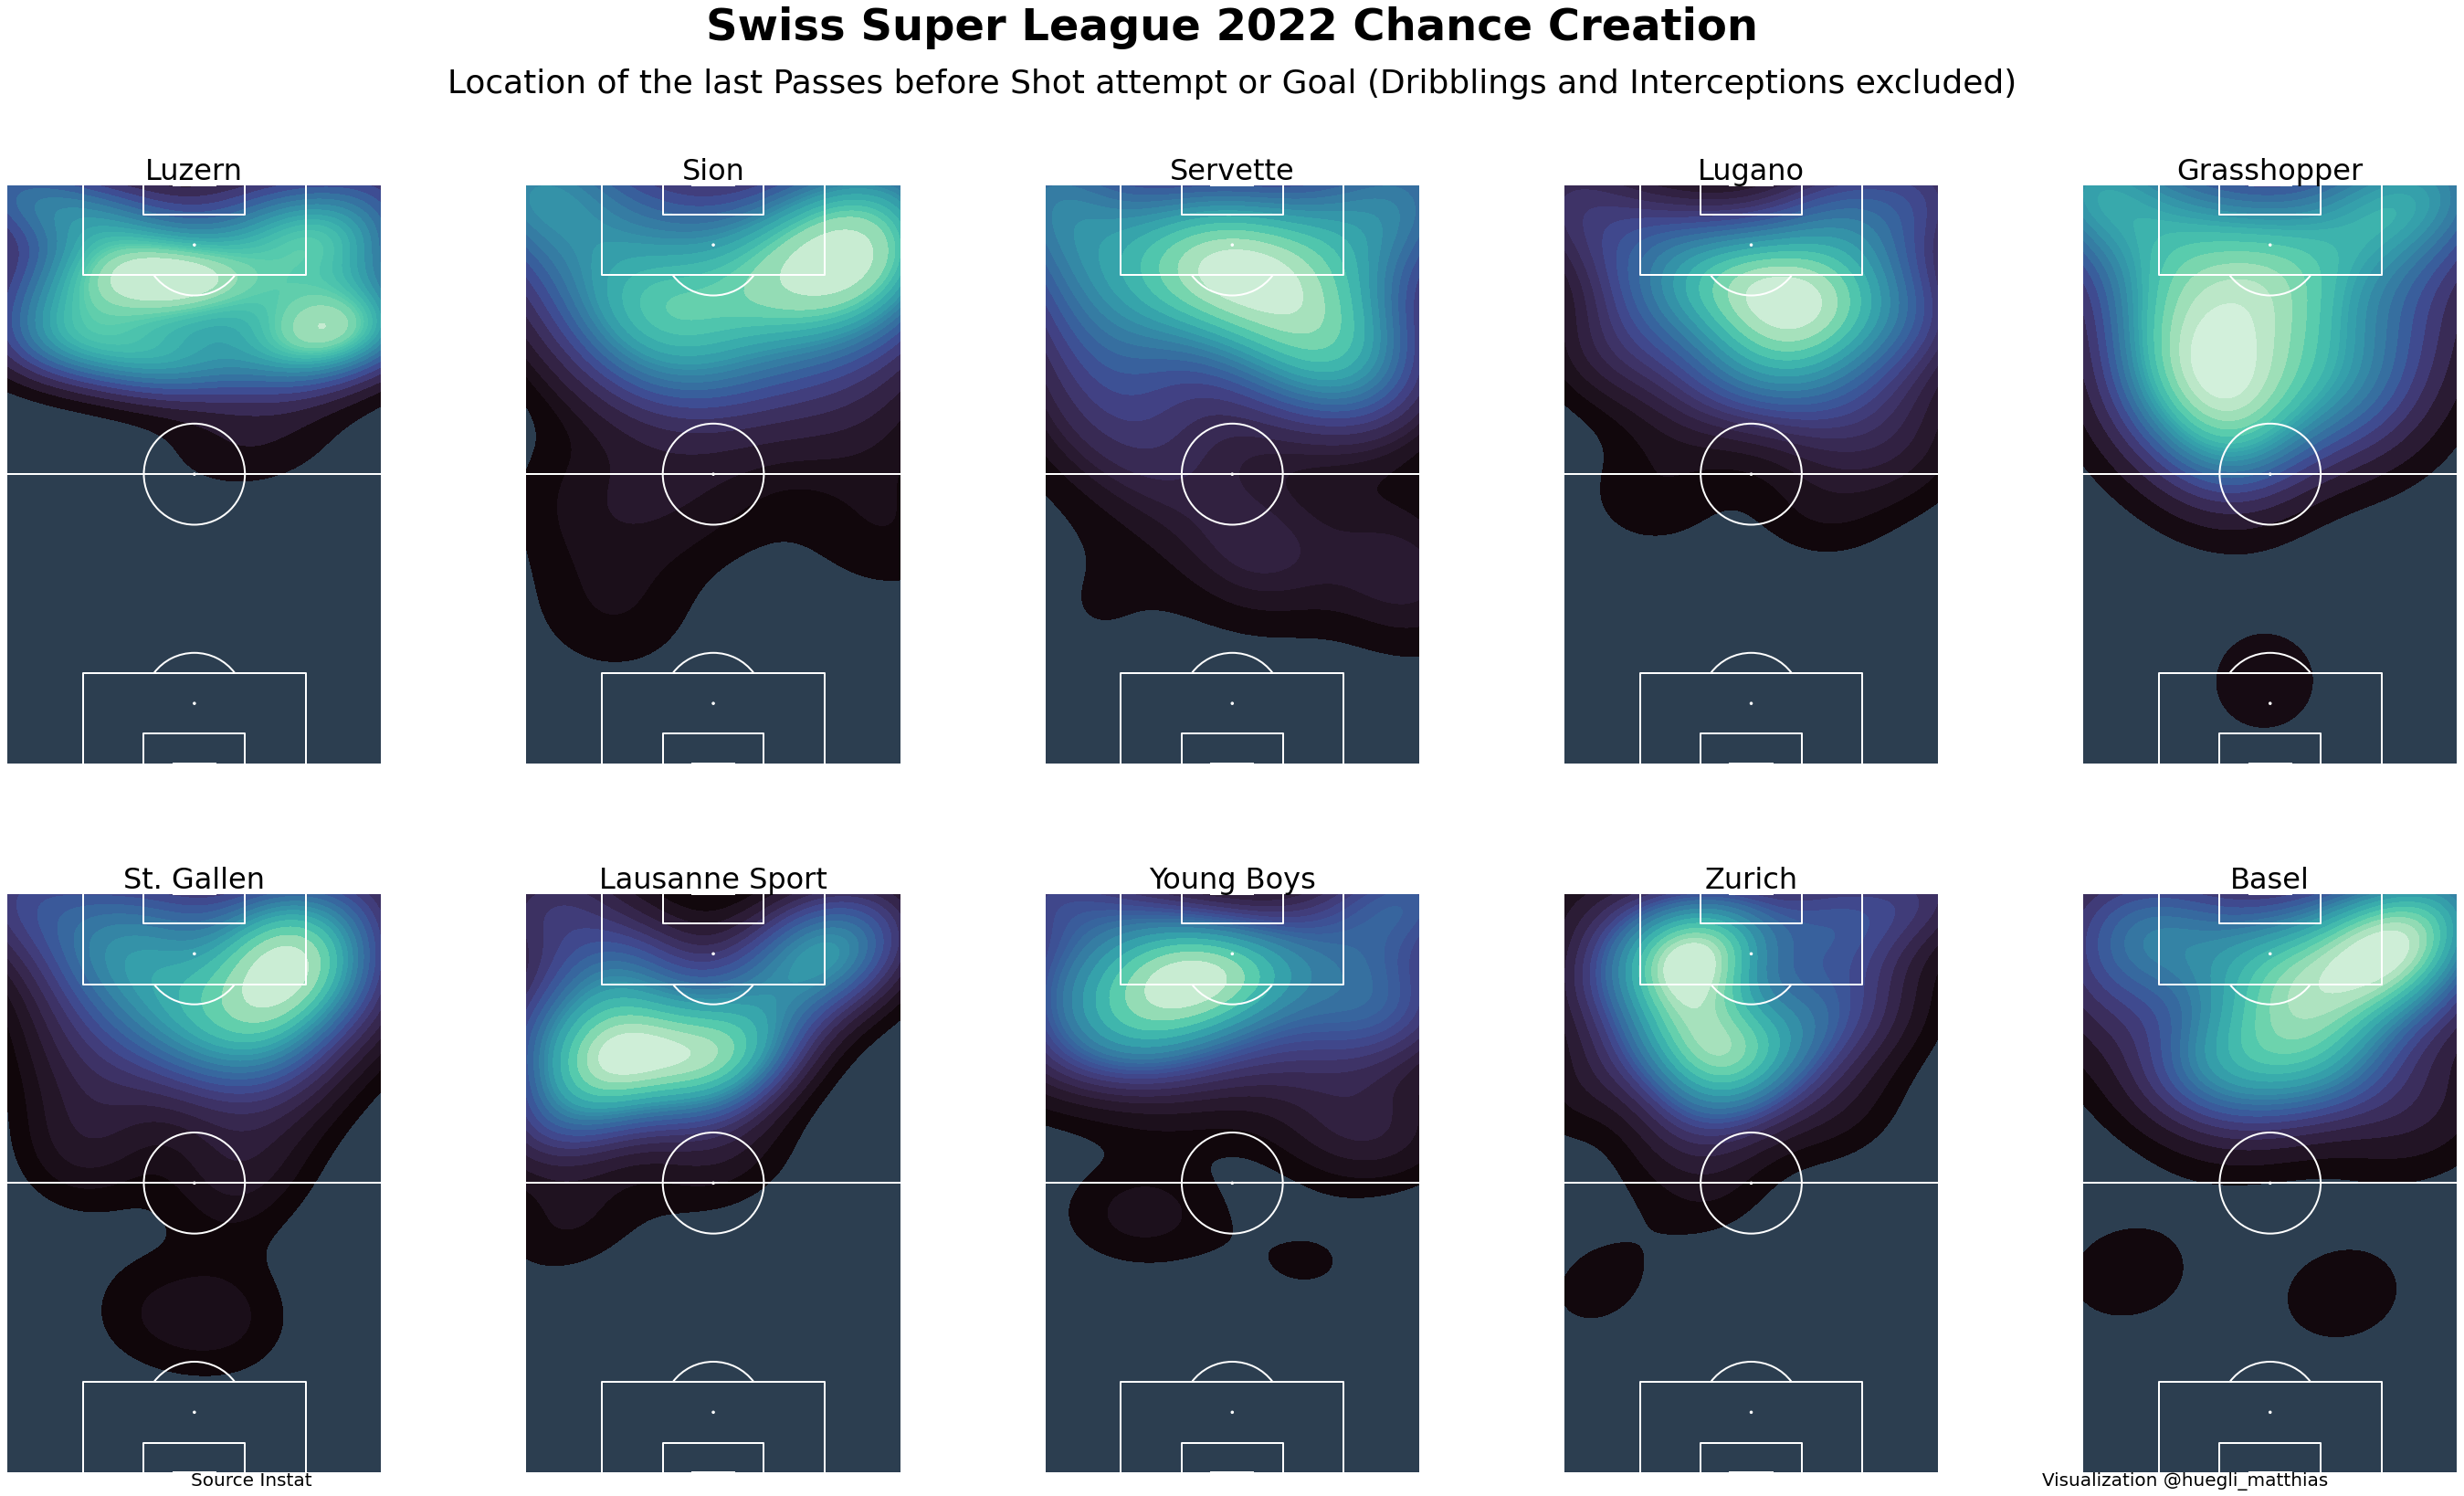

In [217]:
from mplsoccer import VerticalPitch
from matplotlib.colors import LinearSegmentedColormap

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

team = passing['attacking_team'].unique()
passing['x_pos_assist'] = passing['y_pos_ass']
passing['y_pos_assist'] = passing['x_pos_ass']

pitch = VerticalPitch(pitch_color='#2C3E50', line_color='#FFFFFF', pitch_type='uefa', line_zorder=2)
fig, axes = pitch.grid(nrows=2, ncols=5, space=0.1, figheight=20,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
for i, ax in enumerate(axes['pitch'].flat):
    ax.set(xlim=(0,68), ylim=(0,105))
    sns.kdeplot(data=passing[passing['attacking_team'] == team[i]], x='x_pos_assist', y='y_pos_assist', fill=True, ax=ax, shade=True, levels=20, cmap='mako')
    #hexbin = pitch.hexbin(passing['x_pos_assist'], passing['y_pos_assist'], edgecolors='#122c3d', ax=ax, gridsize=(8, 8), cmap=pearl_earring_cmap)
    ax.set_title(team[i], fontsize=32)
fig.text(0.5, 1.1, 'Swiss Super League 2022 Chance Creation', ha='center', fontsize=48, fontweight='bold')
fig.text(0.5, 1.06, 'Location of the last Passes before Shot attempt or Goal (Dribblings and Interceptions excluded)', ha='center', fontsize=36)
fig.text(0.12, 0.001, 'Source Instat', ha='left', fontsize=20)
fig.text(0.9, 0.001, 'Visualization @huegli_matthias', ha='right', fontsize=20)

plt.show()